In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
import numpy as np
import quandl
import scipy.optimize as sco
import scipy.interpolate as sci

In [3]:
import yfinance as yf

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use(style ='seaborn')

## 1. Load Data

We load all possible data for processing using yahoo finance package

###  1.1. Load iShares MSCI Japan Small Cap UCITS ETF USD (Dist) (IUS4.DE)

In [5]:
IUS4_DE = yf.download("IUS4.DE", period='max')['Adj Close']
IUS4_DE.describe()

[*********************100%***********************]  1 of 1 completed


count    3331.000000
mean       25.712013
std         7.915417
min        12.790000
25%        17.940001
50%        24.403999
75%        33.692501
max        39.875000
Name: Adj Close, dtype: float64

In [6]:
IUS4_DE

Date
2008-05-09    25.718599
2008-05-12    25.603300
2008-05-13    25.798000
2008-05-14    25.901400
2008-05-15    26.365000
                ...    
2021-06-22    37.935001
2021-06-23    37.645000
2021-06-24    37.884998
2021-06-25    38.075001
2021-06-30    37.924999
Name: Adj Close, Length: 3331, dtype: float64

### 1.2. Load iShares EURO STOXX Small UCITS ETF EUR (Dist) (DJSC.MI)


In [7]:
DJSC_MI = yf.download("DJSC.MI", period='max')['Adj Close']
DJSC_MI.describe()

[*********************100%***********************]  1 of 1 completed


count    3424.000000
mean       27.995936
std         6.550515
min        12.410000
25%        22.957500
50%        27.602500
75%        33.634998
max        47.590000
Name: Adj Close, dtype: float64

In [8]:
DJSC_MI

Date
2008-01-02    29.540001
2008-01-03    29.160000
2008-01-04    29.160000
2008-01-07    29.150000
2008-01-08    27.900000
                ...    
2021-06-22    46.325001
2021-06-23    45.950001
2021-06-24    46.215000
2021-06-25    46.419998
2021-06-30    45.990002
Name: Adj Close, Length: 3424, dtype: float64

### 1.3. Load Bitcoin EUR (BTC-EUR)

In [9]:
BTC = yf.download("BTC-EUR", period='max')['Adj Close']
BTC.describe()

[*********************100%***********************]  1 of 1 completed


count      648.000000
mean     17237.457097
std      14038.698326
min       4444.237305
25%       7935.385620
50%       9163.726074
75%      27554.739746
max      53123.628906
Name: Adj Close, dtype: float64

In [10]:
BTC

Date
2019-09-18     9246.486328
2019-09-19     9292.973633
2019-09-20     9239.483398
2019-09-21     9092.541992
2019-09-22     9138.951172
                  ...     
2021-06-26    26965.501953
2021-06-27    29013.742188
2021-06-28    28866.302734
2021-06-29    30139.980469
2021-06-30    29385.384766
Name: Adj Close, Length: 648, dtype: float64

### 1.4. Data Processing

Match the data of 3 assets base in time index

In [11]:
# Save collected data
IUS4_DE.to_csv('IUS4_DE.csv')
DJSC_MI.to_csv('DJSC_MI.csv')
BTC.to_csv('BTC.csv')

In [12]:
#import Dataset from saved data

#IUS4_DE_ = pd.read_csv('IUS4_DE.csv', parse_dates =['Date'],index_col=['Date'])
#DJSC_MI_ = pd.read_csv('DJSC_MI.csv', parse_dates =['Date'],index_col=['Date'])
#BTC_ = pd.read_csv('BTC.csv', parse_dates =['Date'],index_col=['Date'])

In [13]:
#import Dataset from collected data

#IUS4_DE_test = pd.read_csv('IUS4.DE-download.csv', parse_dates =['Date'],index_col=['Date'])
#DJSC_MI_test = pd.read_csv('DJSC.MI-download.csv', parse_dates =['Date'],index_col=['Date'])
#BTC_test = pd.read_csv('BTC-EUR-download.csv', parse_dates =['Date'],index_col=['Date'])

In [14]:
assets =['IUS4_DE', 'DJSC_MI', 'BTC']

# Drop null value in dataset
data = pd.concat([IUS4_DE, DJSC_MI, BTC], axis=1).dropna() #axis=1 stack data horizontelly 
                                                                                     # dropna drop the rows with empty cells
data.columns = assets
data

,IUS4_DE,DJSC_MI,BTC
Date,,,
2019-09-18,35.215000,34.865002,9246.486328
2019-09-19,35.875000,35.060001,9292.973633
2019-09-20,36.044998,34.935001,9239.483398
2019-09-23,35.930000,34.564999,8850.279297
2019-09-24,36.055000,34.645000,7826.957031
...,...,...,...
2021-06-22,37.935001,46.325001,27232.396484
2021-06-23,37.645000,45.950001,28266.576172
2021-06-24,37.884998,46.215000,29059.703125


In [15]:
#undrop data for Visualization and process all data
data_v = pd.concat([IUS4_DE, DJSC_MI, BTC], axis=1)
data_v.columns = assets

In [16]:
data_v.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3636 entries, 2008-01-02 to 2021-06-30
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   IUS4_DE  3331 non-null   float64
 1   DJSC_MI  3424 non-null   float64
 2   BTC      648 non-null    float64
dtypes: float64(3)
memory usage: 113.6 KB


## 2. Data Visualization

The price of Bitcon is much higher than IUS4.DE and DJSC.MI. Therefore, we plot the data in 2 y-axes to examize the correlation and trend.

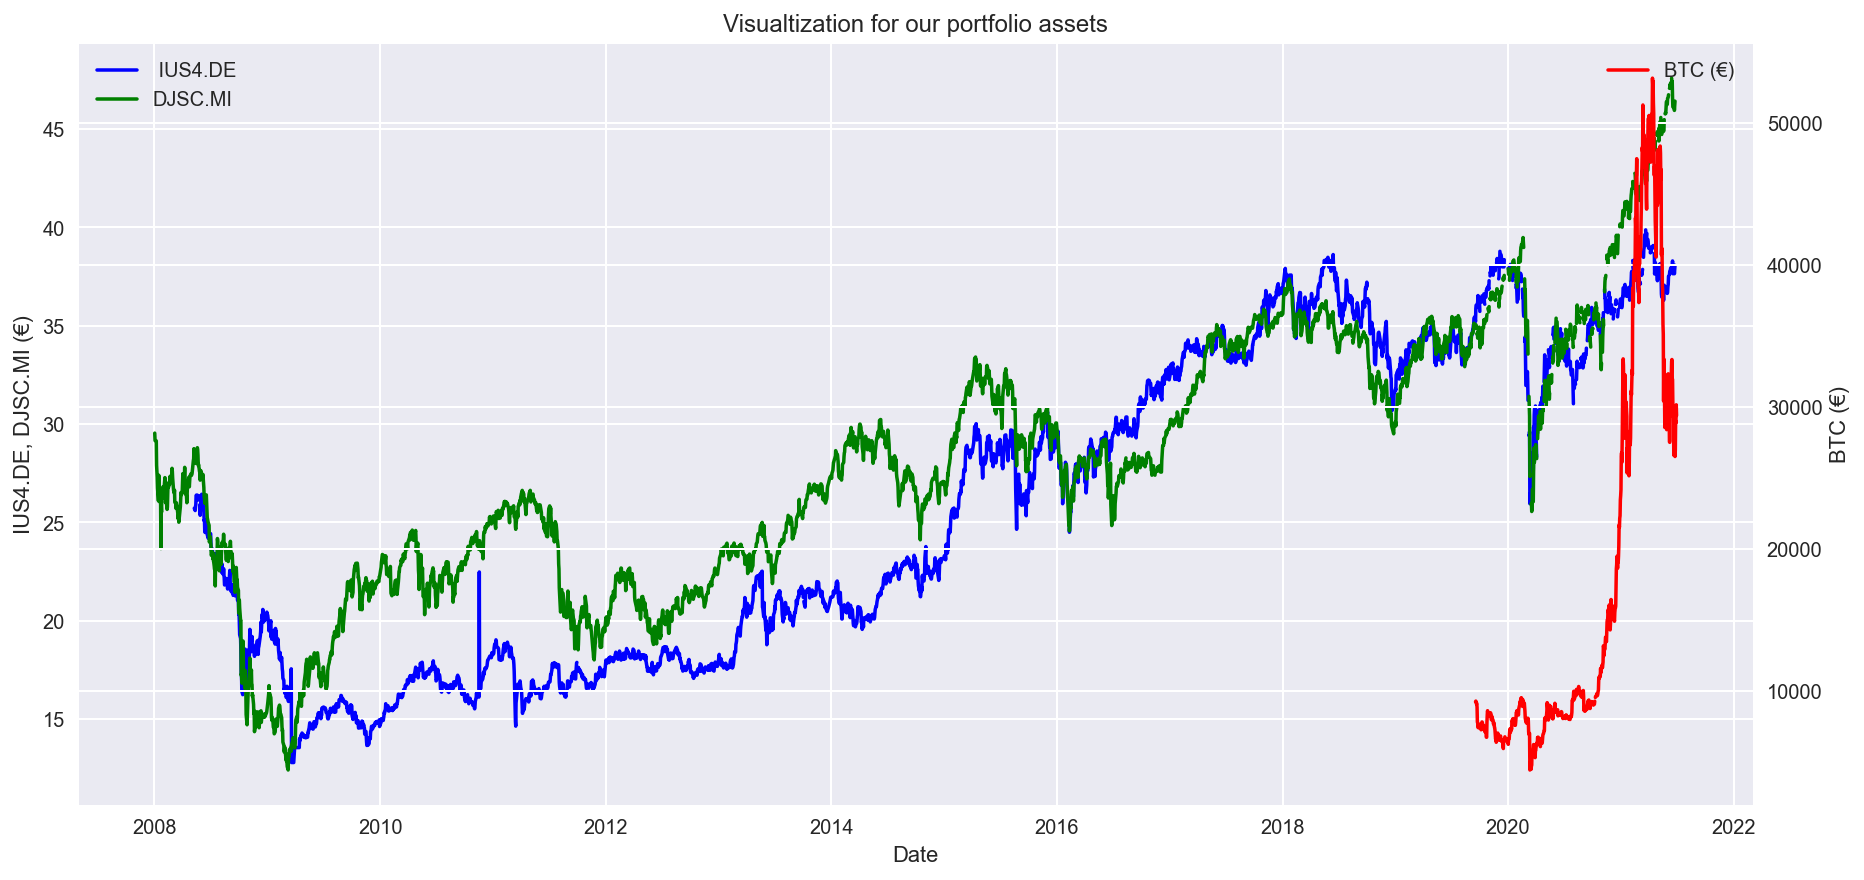

In [17]:
# data_v: data for visualization contains Nan value
plt.figure(figsize = (15,7))
sns.lineplot(data= data_v['IUS4_DE'], color= 'b',label=' IUS4.DE' )
sns.lineplot(data= data_v['DJSC_MI'], color= 'g', label='DJSC.MI')
plt.ylabel('IUS4.DE, DJSC.MI (€)')
ax2 = plt.twinx()
sns.lineplot(data=data_v['BTC'], color ='r',ax= ax2,  label ='BTC (€)')
plt.ylabel('BTC (€)')
plt.title("Visualtization for our portfolio assets")
plt.legend(loc=1)

Text(0.5, 1.0, 'LOG Percentage change of the assets')

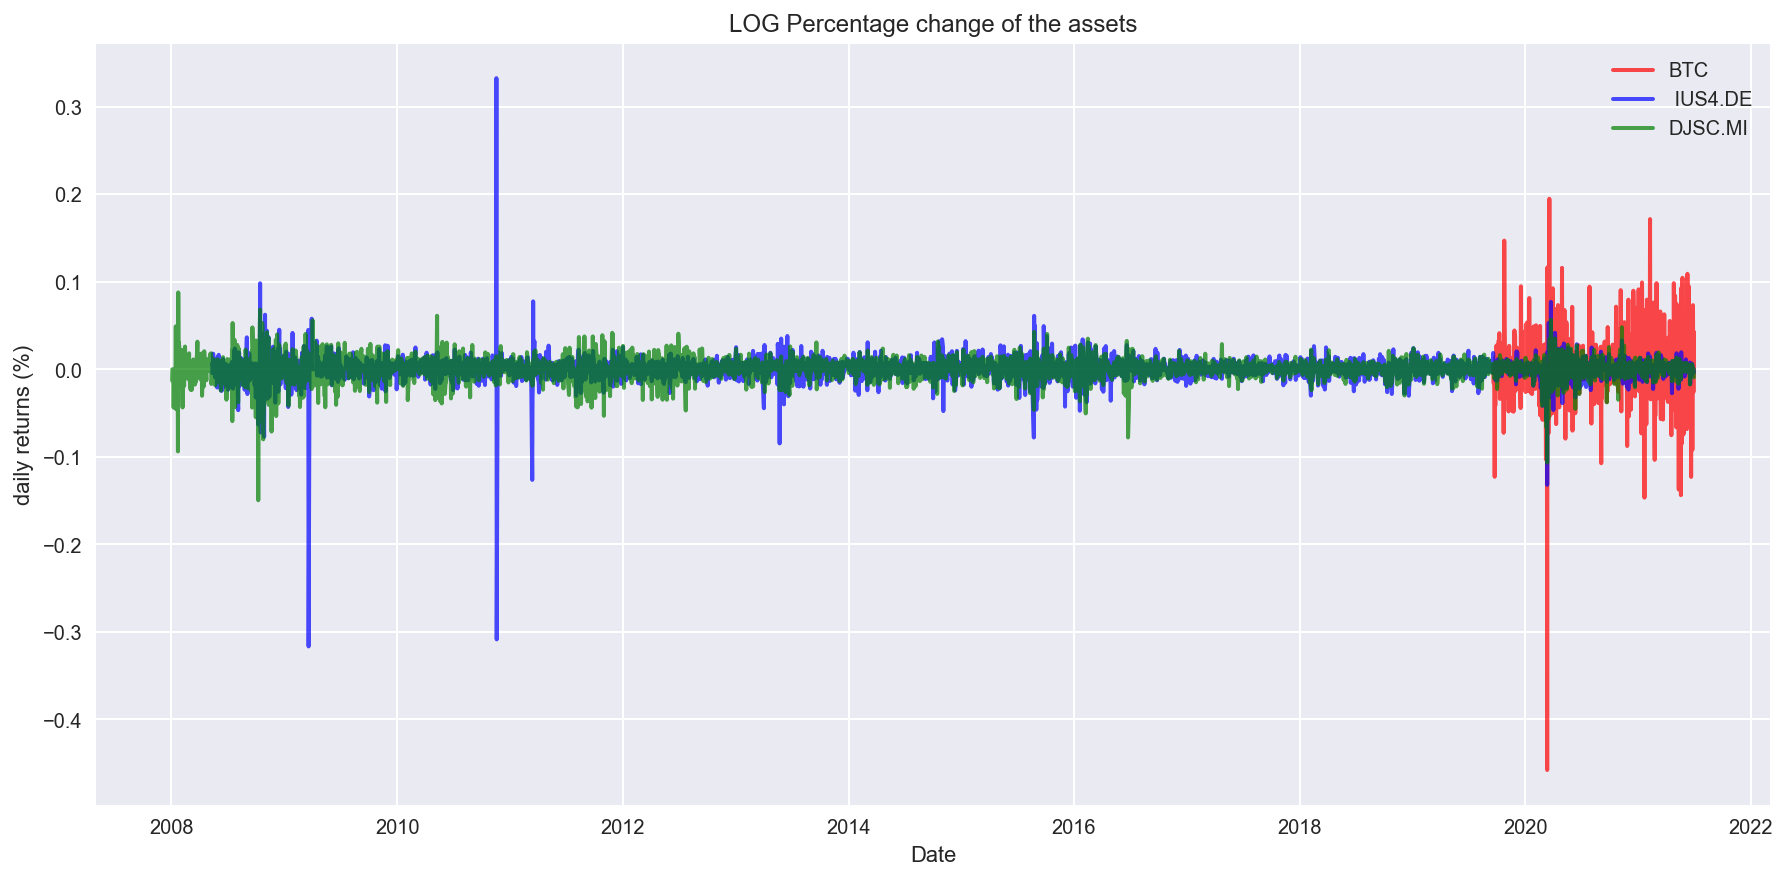

In [18]:
log_returns_v = data_v.pct_change().apply(lambda x: np.log(1+x)) #calculate the log return

plt.figure(figsize = (15,7))
sns.lineplot(data= log_returns_v['BTC'], color ='r',  label ='BTC', lw =2, alpha=0.7)
sns.lineplot(data= log_returns_v['IUS4_DE'], color= 'b',label=' IUS4.DE' , lw =2, alpha=0.7)
sns.lineplot(data= log_returns_v['DJSC_MI'], color= 'g', label='DJSC.MI', lw =2, alpha=0.7)
plt.ylabel('daily returns (%)')
plt.title("LOG Percentage change of the assets")

## 3. Analyzing Data

### 3.1. Portfolio Optimization

In [19]:
# initialize contraints
no_of_assets = 3
num_portfolios = 10000
risk_free_rate = 0.008  # As of 2020, the risk-free rate in Germany was 0.8 percent. Source: https://www.statista.com/statistics/885774/average-risk-free-rate-germany/

In [20]:
# Data preparation
returns = data.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()


log_returns = data.pct_change().apply(lambda x: np.log(1+x))
mean_log_returns = log_returns.mean()
cov_matrix_log = log_returns.cov()

In [21]:
mean_returns.index

Index(['IUS4_DE', 'DJSC_MI', 'BTC'], dtype='object')

In [22]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

# for generate random portfolio
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(3)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [23]:
# visualize random portfolio
def display_simulated_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=mean_returns.index,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=mean_returns.index,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(15, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar(label='Sharpe ratio')
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

We plot 10000 random generated portfolios with Annual volatility and anualised returns. Instead of using the percentage change in price of assets everyday, I calculate the difference in Log(t) and log(t-1).

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.29
Annualised Volatility: 0.3


            IUS4_DE  DJSC_MI   BTC
allocation     0.15    73.95  25.9
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.11
Annualised Volatility: 0.2


            IUS4_DE  DJSC_MI   BTC
allocation    38.61    61.31  0.08


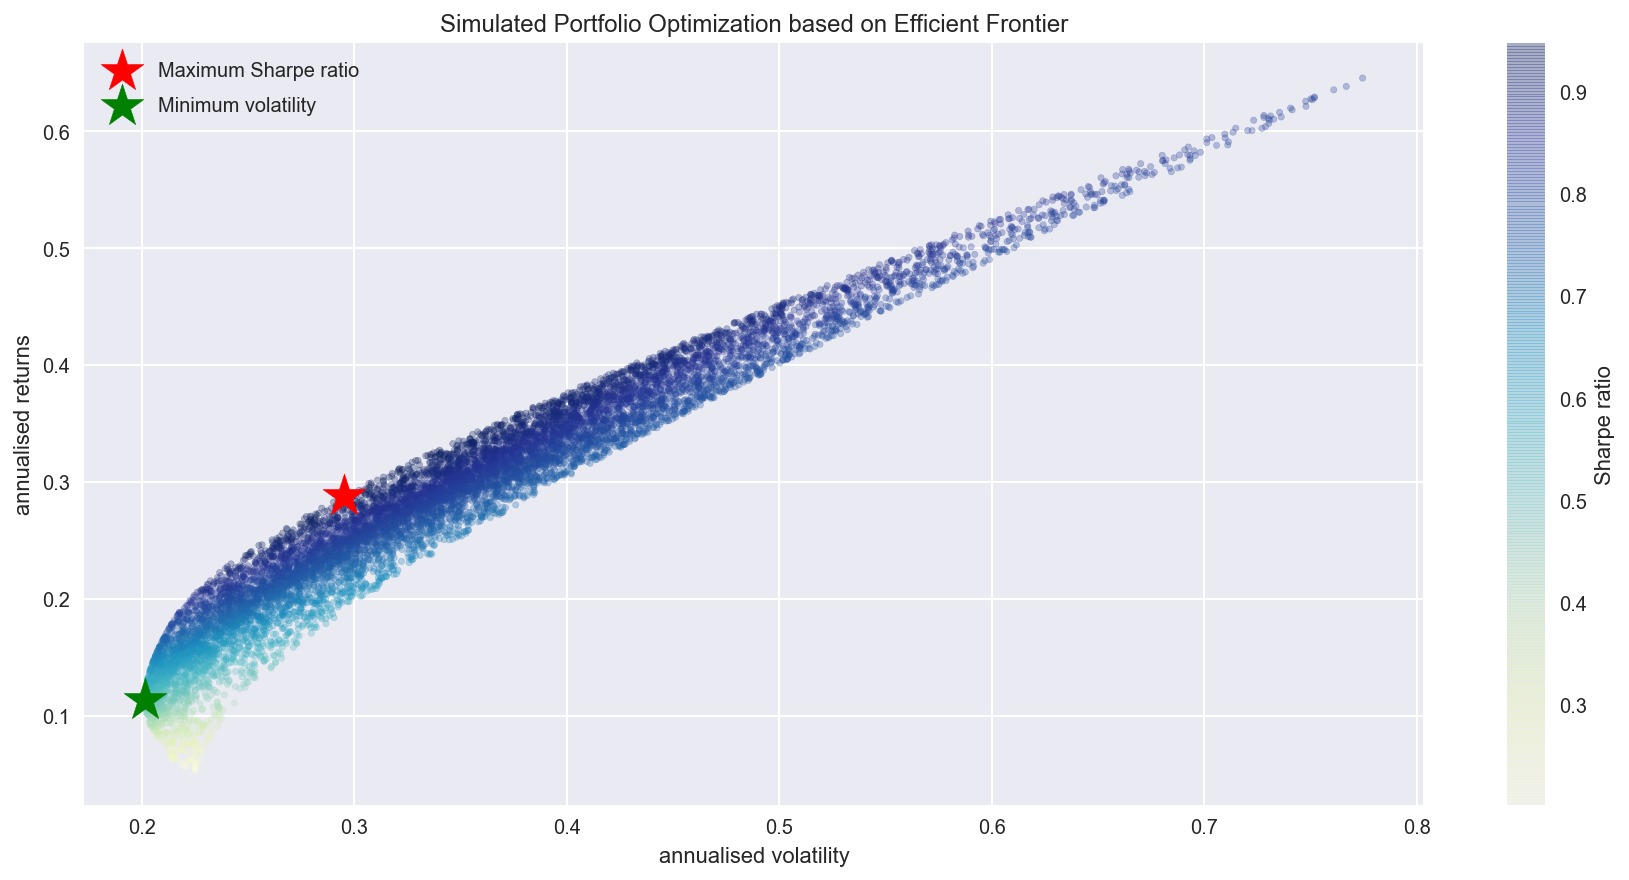

In [24]:
display_simulated_with_random(mean_log_returns, cov_matrix_log, num_portfolios, risk_free_rate)

### 3.1.3 Efficient Frontier and capital market line

Because we don't have maximimize function in Scipy optimize, we use negative function for shape ratio to find the maximum sharp ratio function using sco.minimize.

In [25]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [26]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [27]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [28]:
def display_calculated_ef(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=mean_returns.index,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=mean_returns.index,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(15, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar(label='Sharpe ratio')
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(0.05, 0.6, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)

    # Capital Market Line

    minimal_volatilities = []
    for p in efficient_portfolios:
        minimal_volatilities.append(p['fun'])
    minimal_volatilities = np.array(minimal_volatilities)

    min_index = np.argmin(minimal_volatilities)
    ex_returns = minimal_volatilities[min_index:]
    ex_volatilities = target[min_index:]
    tck = sci.splrep(ex_returns, ex_volatilities)


    def f(x):
    #''' Efficient frontier function (splines approximation). ''' 
        return sci.splev(x, tck, der=0)

    def df(x):
    #''' First derivative of efficient frontier function. ''' 
        return sci.splev(x, tck, der=1)

    def equations(p, rf=0.01): 
        eq1= rf - p[0]
        eq2= rf + p[1]*p[2] - f(p[2]) 
        eq3 = p[1] - df(p[2])
        return eq1, eq2, eq3

    opt = sco.fsolve(equations, [0.1, 0.3, 0.4])
    cx = np.linspace(0.0, 0.6)

    plt.plot(cx, opt[0] + opt[1] * cx, 'y', lw=2.5)
    #plt.plot(opt[2], f(opt[2]), 'y*', markersize=20.0)
    plt.axhline(0, color='k', ls='--', lw=2.0)
    plt.axvline(0, color='k', ls='--', lw=2.0)

    
    plt.plot([p['fun'] for p in efficient_portfolios], target, color='red', label='efficient frontier', lw =4, alpha = 0.6 )
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

### Plot calculated Efficient Frontier and Market line for portfolio

The Efficient Frontier was calculated with the difference of return everyday of the portfolio in the consideration of risk free rate

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.29
Annualised Volatility: 0.29


            IUS4_DE  DJSC_MI    BTC
allocation      0.0    74.14  25.86
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.12
Annualised Volatility: 0.2


            IUS4_DE  DJSC_MI  BTC
allocation    37.04    62.96  0.0


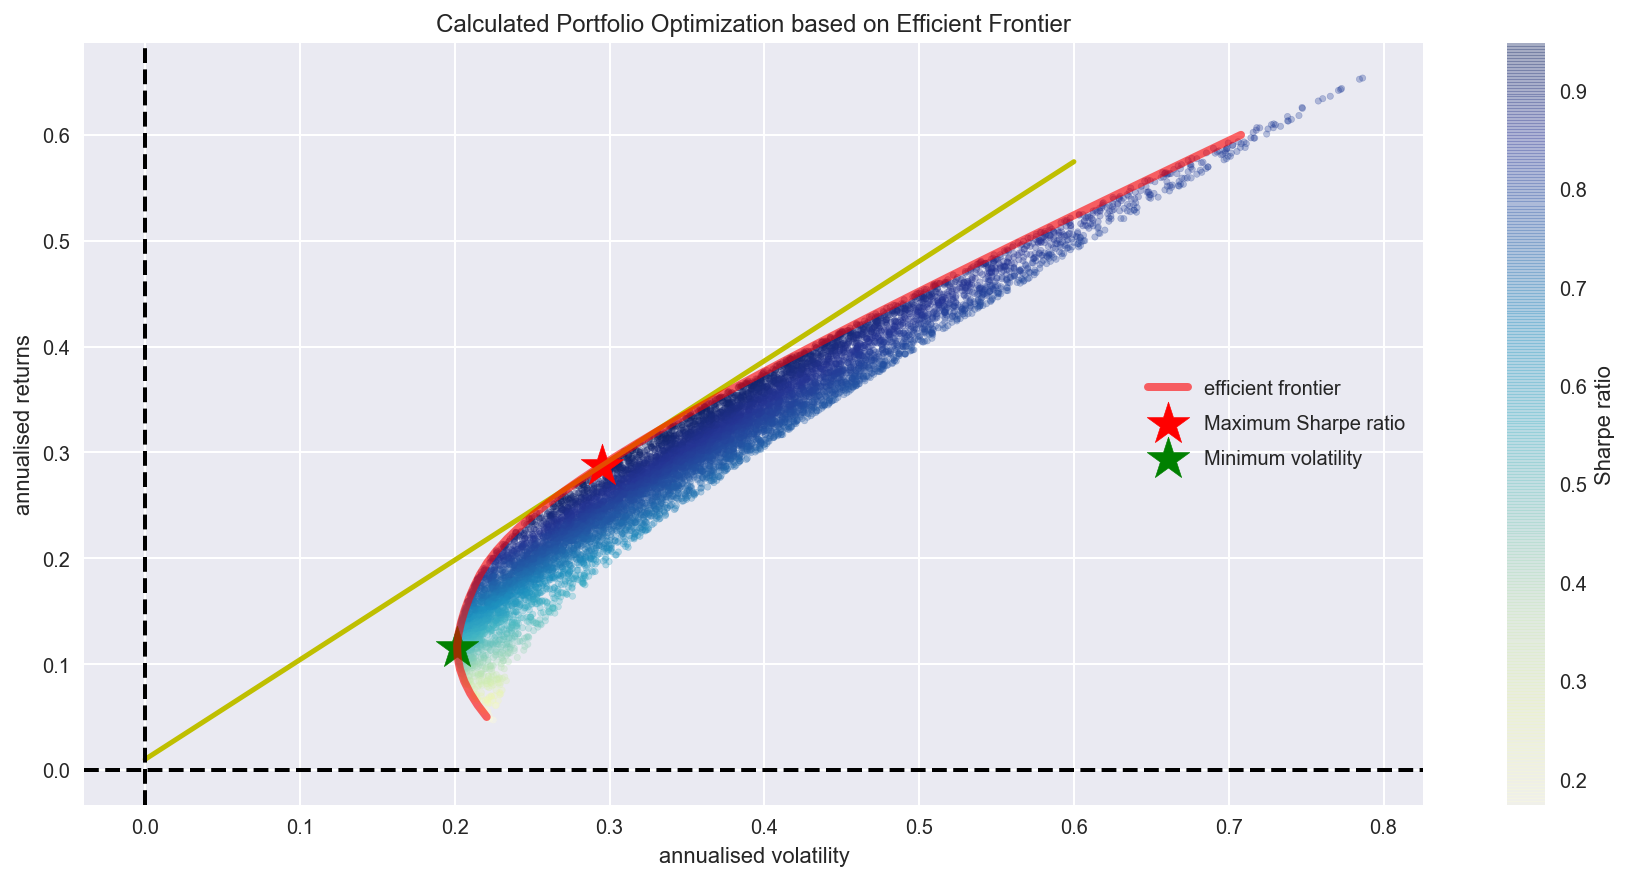

In [29]:
display_calculated_ef(mean_log_returns, cov_matrix_log, num_portfolios, risk_free_rate)

### 3.2 Portfolio selection

From the above analysis results, we know the allocation for our portfolio
at Maximum sharpe ratio and minimum volatility point on Efficient Frontier. In this part, we will find different
portfolio allocation for different risk aversion level

### 3.2.1 Portfolio with risk aversion level at: 24% (Volatility)

In [30]:
target = np.linspace(0.05, 0.8, 100)
efficient_portfolios = efficient_frontier(mean_log_returns, cov_matrix_log, target)

In [31]:
def portfolio_allocation(risk_aversion):
    for p in efficient_portfolios:   # calculate return for specific level of volatility
        if p['fun'] > risk_aversion:
            allocation = pd.DataFrame(p.x,index=mean_returns.index,columns=['allocation (%)'])
            sdp, rp = portfolio_annualised_performance(p.x, mean_log_returns, cov_matrix_log)
            print ("-"*80)
            print ("Portfolio Allocation: \n")
            print ("Annualised Return:", round(rp,2))
            print ("Annualised Volatility:", round(sdp,2))
            allocation= round(allocation*100,2)
            print(allocation)
            break

In [32]:
portfolio_allocation(0.24)

--------------------------------------------------------------------------------
Portfolio Allocation: 

Annualised Return: 0.23
Annualised Volatility: 0.24
         allocation (%)
IUS4_DE            0.00
DJSC_MI           85.25
BTC               14.75


### 3.2.2 Portfolio with risk aversion level at: 40% (Volatility)

In [33]:
portfolio_allocation(0.4)

--------------------------------------------------------------------------------
Portfolio Allocation: 

Annualised Return: 0.38
Annualised Volatility: 0.41
         allocation (%)
IUS4_DE            0.00
DJSC_MI           55.03
BTC               44.97


### 3.2.3 Portfolio with risk aversion level at: 50% (Volatility)

In [34]:
portfolio_allocation(0.50)

--------------------------------------------------------------------------------
Portfolio Allocation: 

Annualised Return: 0.46
Annualised Volatility: 0.51
         allocation (%)
IUS4_DE            0.00
DJSC_MI           39.92
BTC               60.08


### 3.3. Inspect Individual asset

We could realize that the allocation for IUS4.DE is almost nothing for a portfolio on efficient frontier.
To answer for the question: why?, we decide to analyze the characteristic of each asset. 

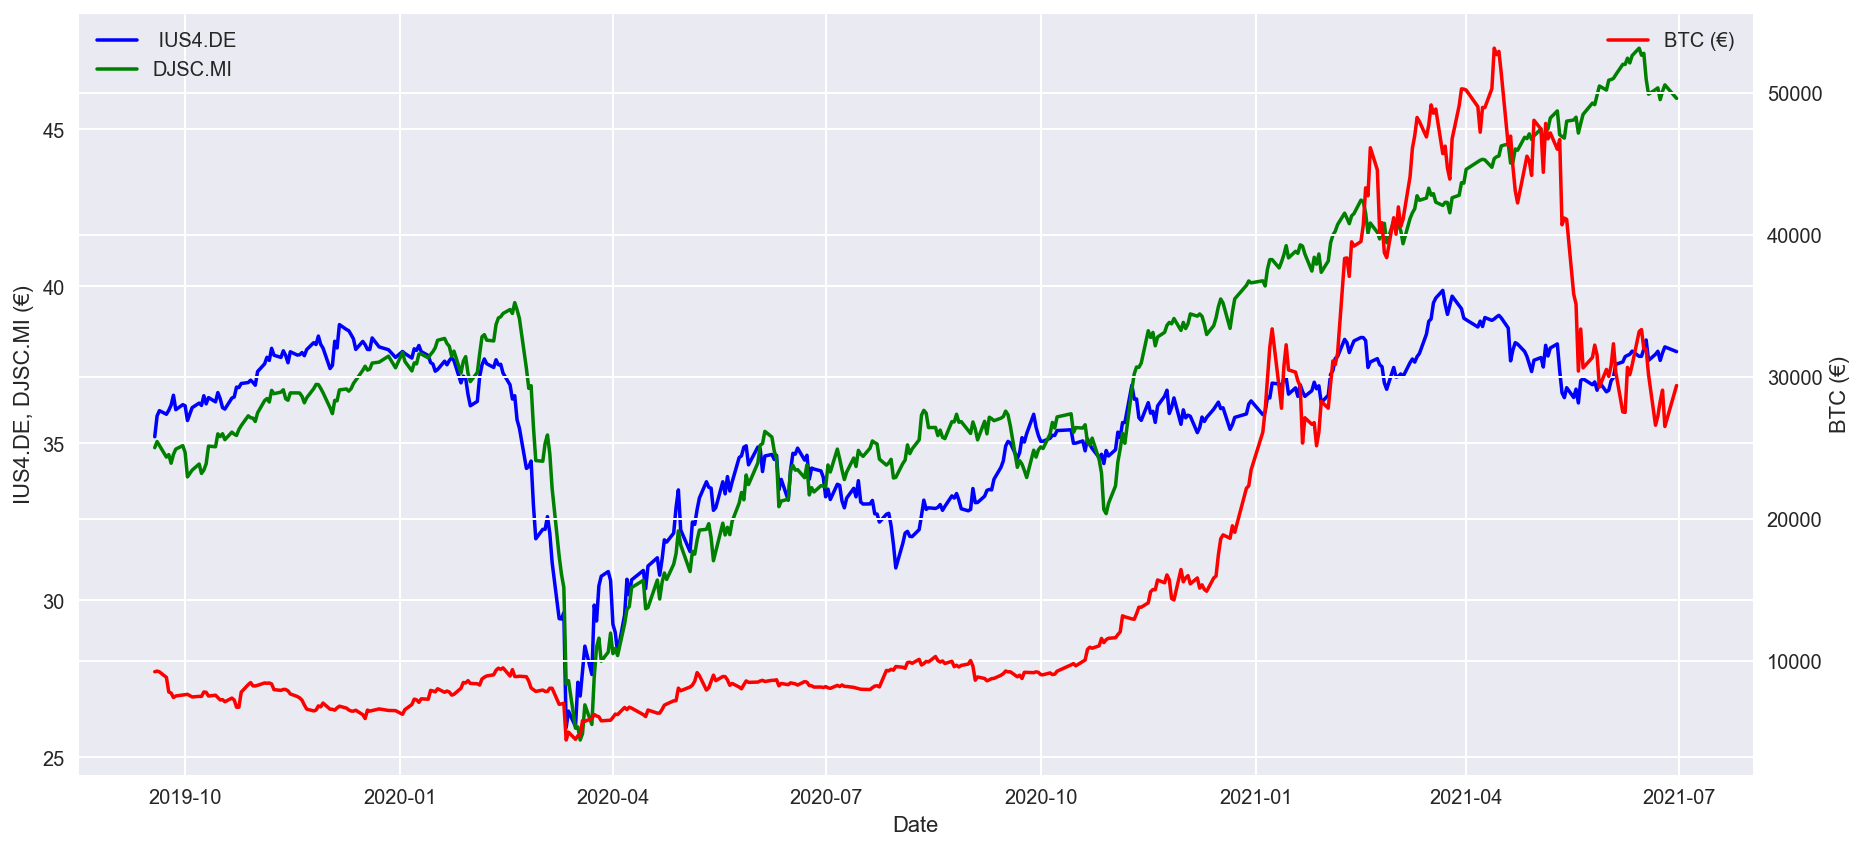

In [35]:
plt.figure(figsize = (15,7))
sns.lineplot(data= data['IUS4_DE'], color= 'b',label=' IUS4.DE' )
sns.lineplot(data= data['DJSC_MI'], color= 'g', label='DJSC.MI')
plt.ylabel('IUS4.DE, DJSC.MI (€)')
ax2 = plt.twinx()
sns.lineplot(data=data['BTC'], color ='r',ax= ax2,  label ='BTC (€)')
plt.ylabel('BTC (€)')
plt.legend(loc=1)

Text(0, 0.5, 'daily returns')

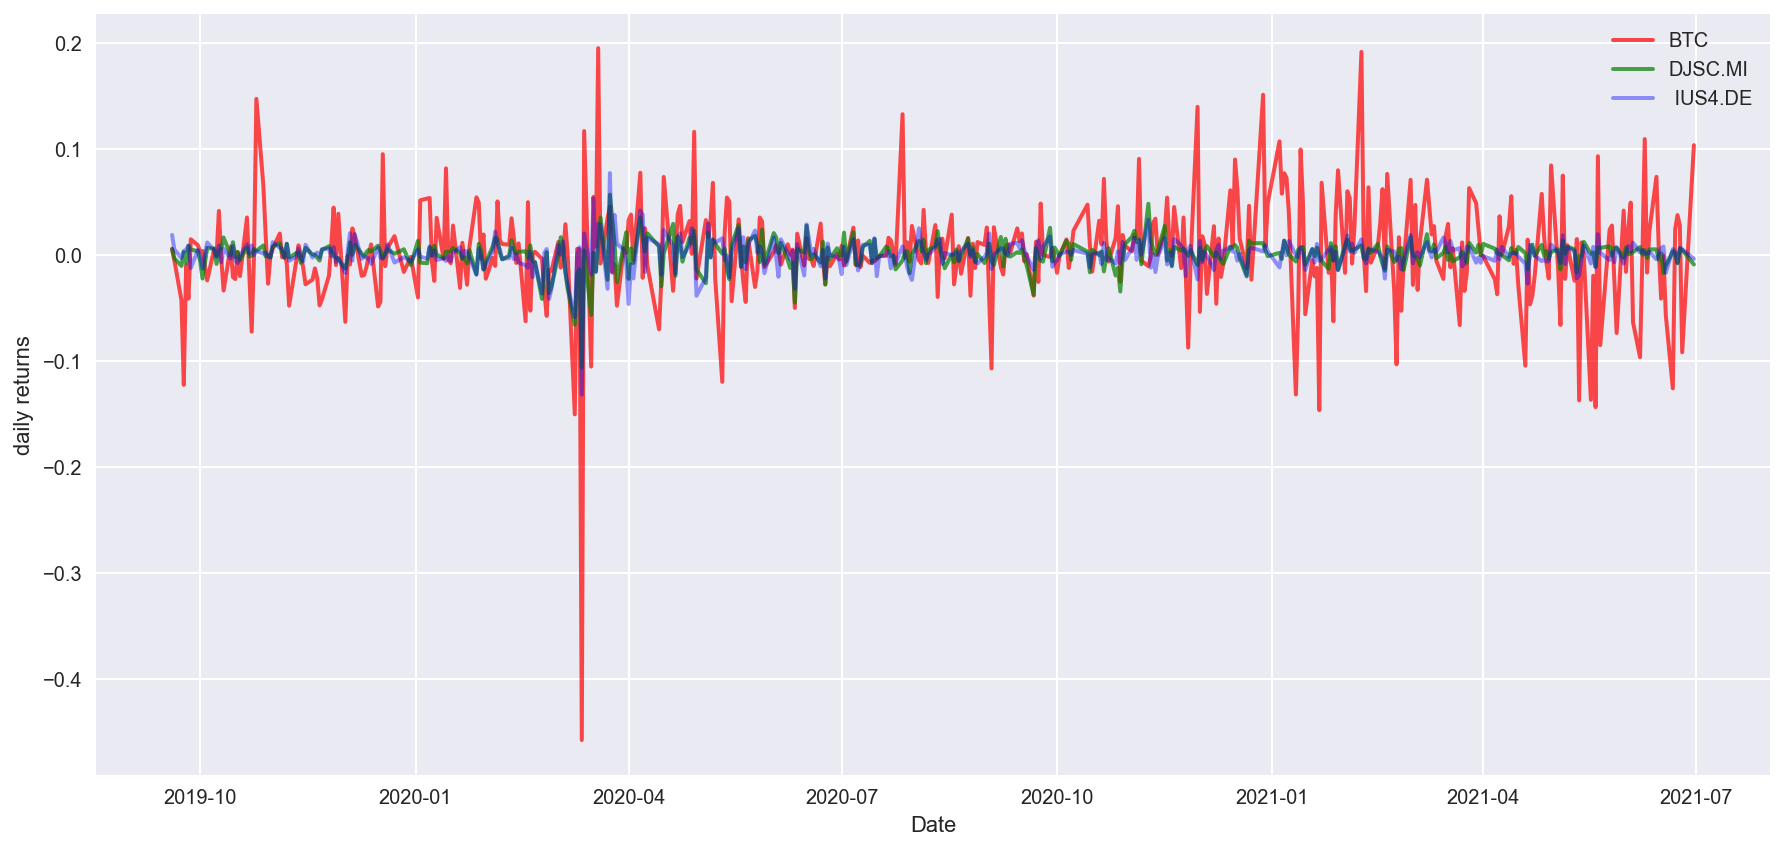

In [36]:
plt.figure(figsize = (15,7))
sns.lineplot(data=log_returns['BTC'], color ='r',  label ='BTC', lw =2, alpha=0.7)
sns.lineplot(data= log_returns['DJSC_MI'], color= 'g', label='DJSC.MI', lw =2, alpha=0.7)
sns.lineplot(data= log_returns['IUS4_DE'], color= 'b',label=' IUS4.DE' , lw =2, alpha=0.4)

plt.ylabel('daily returns')

In [37]:
cov_matrix_log

,IUS4_DE,DJSC_MI,BTC
IUS4_DE,0.000201,0.000137,0.000240
DJSC_MI,0.000137,0.000175,0.000214
BTC,0.000240,0.000214,0.002497


In [38]:
mean_log_returns

IUS4_DE    0.000168
DJSC_MI    0.000627
BTC        0.002616
dtype: float64

### Individual assest 

In [39]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=mean_returns.index,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=mean_returns.index,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(mean_returns.index):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(mean_returns.index):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.6, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.29
Annualised Volatility: 0.29


            IUS4_DE  DJSC_MI    BTC
allocation      0.0    74.14  25.86
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.12
Annualised Volatility: 0.2


            IUS4_DE  DJSC_MI  BTC
allocation    37.04    62.96  0.0
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

IUS4_DE : annuaised return 0.04 , annualised volatility: 0.22
DJSC_MI : annuaised return 0.16 , annualised volatility: 0.21
BTC : annuaised return 0.66 , annualised volatility: 0.77
--------------------------------------------------------------------------------


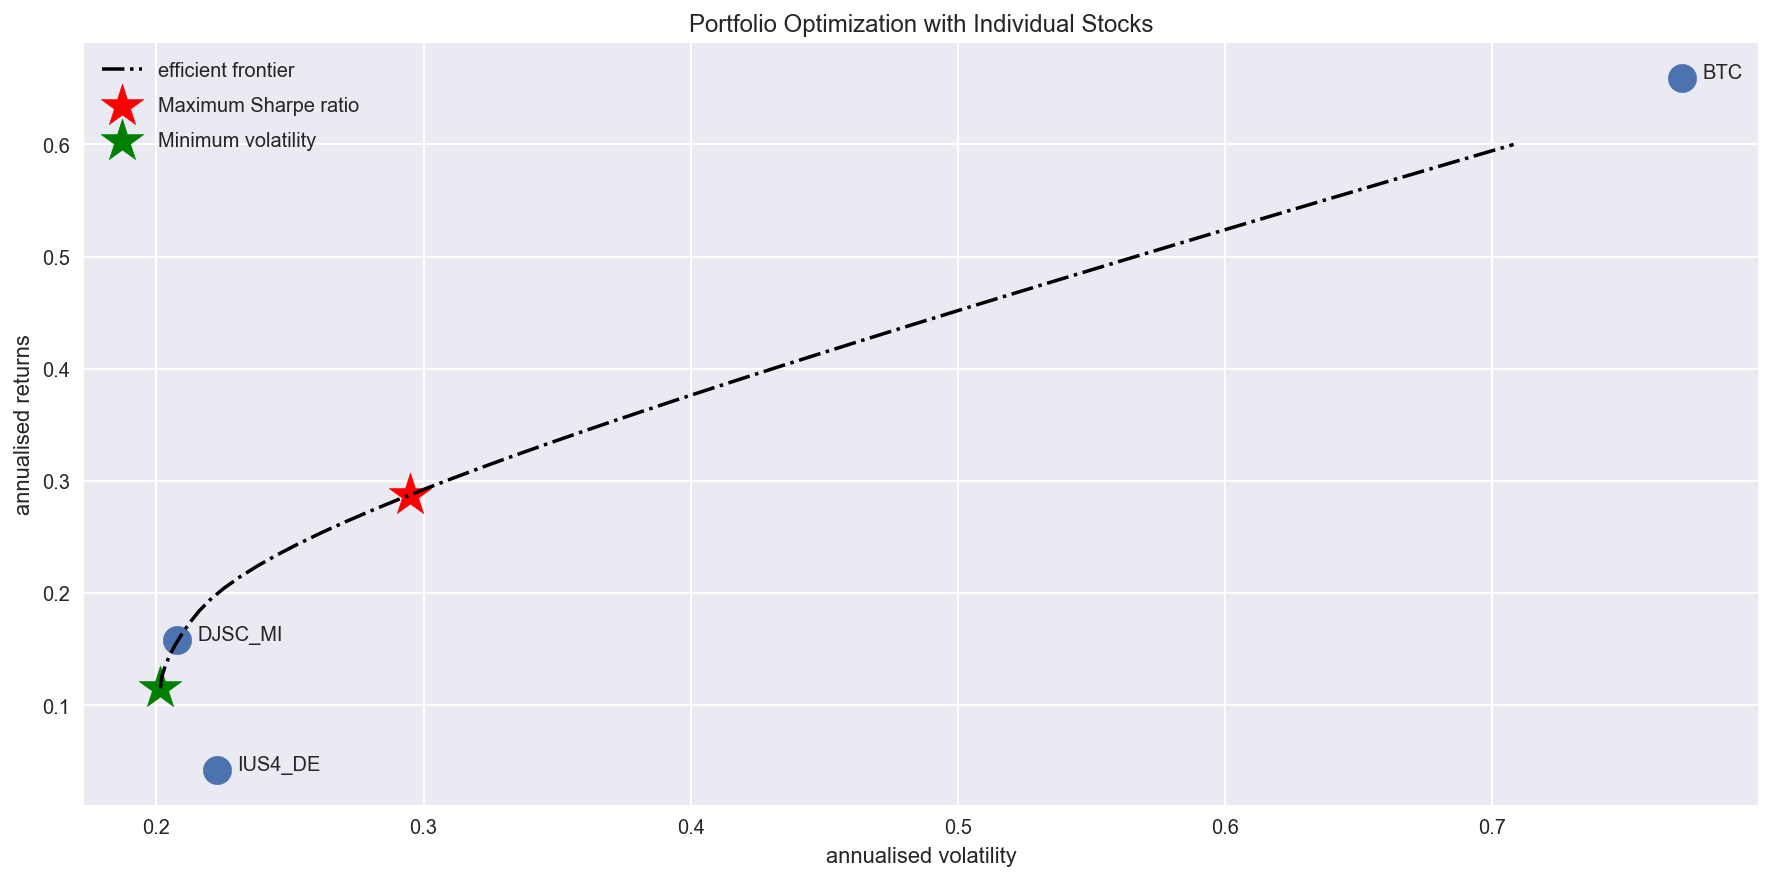

In [40]:
display_ef_with_selected(mean_log_returns, cov_matrix_log, risk_free_rate)